<a href="https://colab.research.google.com/github/MatSci495/Lectures/blob/main/Line_Shape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate plots comparing simulated Gaussian and Lorentzian line shapes with the same maximum, position, and FWHM. Include a residual sub-plot showing the difference between the two curves. Create three plots: one without noise, one with controllable Gaussian noise, and one with controllable Poisson noise. Finally, generate histograms comparing the Gaussian and Poisson noise distributions.

## Define functions

### Subtask:
Define Python functions for the Gaussian and Lorentzian line shapes, each with parameters for maximum, position, and full width at half maximum (FWHM).


**Reasoning**:
Define the Gaussian and Lorentzian functions as specified in the instructions, including the necessary imports from numpy.



In [1]:
import numpy as np

def gaussian(x, maximum, position, fwhm):
  """Calculates the Gaussian line shape.

  Args:
    x: The independent variable.
    maximum: The maximum value of the peak.
    position: The position of the peak's center.
    fwhm: The full width at half maximum.

  Returns:
    The Gaussian function values.
  """
  sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
  return maximum * np.exp(-((x - position)**2) / (2 * sigma**2))

def lorentzian(x, maximum, position, fwhm):
  """Calculates the Lorentzian line shape.

  Args:
    x: The independent variable.
    maximum: The maximum value of the peak.
    position: The position of the peak's center.
    fwhm: The full width at half maximum.

  Returns:
    The Lorentzian function values.
  """
  gamma = fwhm / 2
  return maximum * (gamma**2 / ((x - position)**2 + gamma**2))

## Generate data

### Subtask:
Generate data for the x-axis and calculate the corresponding y-values for both the Gaussian and Lorentzian functions based on the specified parameters.


**Reasoning**:
Generate the x-axis data and calculate the y-values for both Gaussian and Lorentzian functions based on the defined parameters.



In [2]:
# Define parameters
maximum = 1.0
position = 0.0
fwhm = 1.0

# Create x-axis data
x = np.linspace(-5, 5, 500)

# Calculate y-values for Gaussian and Lorentzian functions
y_gaussian = gaussian(x, maximum, position, fwhm)
y_lorentzian = lorentzian(x, maximum, position, fwhm)

## Create plot without noise

### Subtask:
Generate a plot comparing the Gaussian and Lorentzian line shapes without any noise. Include a sub-plot showing the residuals (the difference between the two curves).


**Reasoning**:
Generate a plot comparing the Gaussian and Lorentzian line shapes without any noise, including a subplot showing the residuals, as per the instructions.



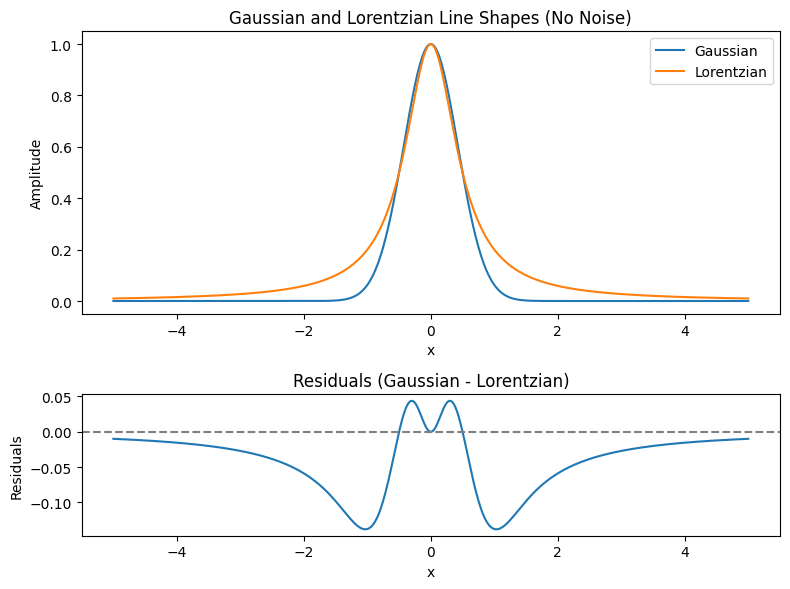

In [9]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots, adjusting the height ratio
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), gridspec_kw={'height_ratios': [2, 1]})

# Plot Gaussian and Lorentzian line shapes in the first subplot
axes[0].plot(x, y_gaussian, label='Gaussian')
axes[0].plot(x, y_lorentzian, label='Lorentzian')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Gaussian and Lorentzian Line Shapes (No Noise)')
axes[0].legend()

# Calculate and plot residuals in the second subplot
residuals = y_gaussian - y_lorentzian
axes[1].plot(x, residuals)
axes[1].set_xlabel('x')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals (Gaussian - Lorentzian)')
axes[1].axhline(0, color='gray', linestyle='--') # Add dashed zero line

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Add gaussian noise

### Subtask:
Add Gaussian noise to the simulated Gaussian and Lorentzian data. The noise level should be controllable by a parameter.


**Reasoning**:
Define the gaussian_noise_level variable, generate Gaussian noise, and add it to the existing Gaussian and Lorentzian data.



In [20]:
gaussian_noise_level = 0.1

np.random.seed(42) # Seed for Gaussian noise on Gaussian curve
gaussian_noise_gaussian = np.random.normal(0, gaussian_noise_level, size=y_gaussian.shape)

np.random.seed(43) # Seed for Gaussian noise on Lorentzian curve
gaussian_noise_lorentzian = np.random.normal(0, gaussian_noise_level, size=y_lorentzian.shape)


y_gaussian_noisy = y_gaussian + gaussian_noise_gaussian
y_lorentzian_noisy = y_lorentzian + gaussian_noise_lorentzian

## Create plot with gaussian noise

### Subtask:
Generate a plot comparing the Gaussian and Lorentzian line shapes with Gaussian noise. Include a sub-plot showing the residuals.


**Reasoning**:
Generate a plot comparing the Gaussian and Lorentzian line shapes with Gaussian noise and include a residual subplot showing the difference between the two curves, following the instructions.



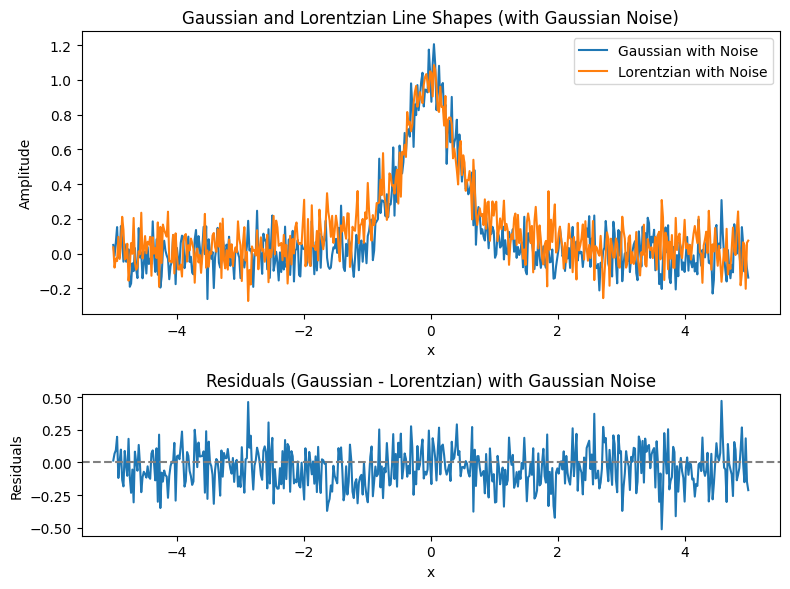

In [16]:
# Create a figure and a set of subplots, adjusting the height ratio
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), gridspec_kw={'height_ratios': [2, 1]})

# Plot Gaussian and Lorentzian line shapes with noise in the first subplot
axes[0].plot(x, y_gaussian_noisy, label='Gaussian with Noise')
axes[0].plot(x, y_lorentzian_noisy, label='Lorentzian with Noise')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Gaussian and Lorentzian Line Shapes (with Gaussian Noise)')
axes[0].legend()

# Calculate and plot residuals in the second subplot using the noisy data
residuals_noisy = y_gaussian_noisy - y_lorentzian_noisy
axes[1].plot(x, residuals_noisy)
axes[1].set_xlabel('x')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals (Gaussian - Lorentzian) with Gaussian Noise')
axes[1].axhline(0, color='gray', linestyle='--') # Add dashed zero line


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Add poisson noise

### Subtask:
Add Poisson noise to the simulated Gaussian and Lorentzian data. The noise level should be controllable by a parameter.


**Reasoning**:
Define the poisson_noise_level variable, scale the data to represent counts, generate Poisson noise, add the noise to the scaled data, and then scale the data back to the original amplitude range.



In [31]:
poisson_noise_level = 10.0 # Adjust this to control the noise magnitude

# Scale the signal to represent counts (assuming original amplitude is proportional to rate)
# We scale by a factor that makes the maximum value represent a certain number of counts
# Increased scaling factor to get higher counts and closer approximation to Gaussian
scaling_factor = 1000 / maximum  # Scale such that the maximum value corresponds to 1000 counts

y_gaussian_scaled = y_gaussian * scaling_factor
y_lorentzian_scaled = y_lorentzian * scaling_factor

# Generate Poisson noise. np.random.poisson expects the lambda parameter (rate)
# Since scaled data represents counts, we can use it directly as lambda,
# but ensure non-negative values for lambda.
np.random.seed(44) # Seed for Poisson noise on Gaussian curve
poisson_noise_gaussian = np.random.poisson(np.maximum(0, y_gaussian_scaled))

np.random.seed(45) # Seed for Poisson noise on Lorentzian curve
poisson_noise_lorentzian = np.random.poisson(np.maximum(0, y_lorentzian_scaled))

# Add Poisson noise to the scaled data by scaling the generated noise
y_gaussian_poisson_noisy_scaled = y_gaussian_scaled + (poisson_noise_gaussian - y_gaussian_scaled) * poisson_noise_level
y_lorentzian_poisson_noisy_scaled = y_lorentzian_scaled + (poisson_noise_lorentzian - y_lorentzian_scaled) * poisson_noise_level


# Scale the data back to the original amplitude range
y_gaussian_poisson_noisy = y_gaussian_poisson_noisy_scaled / scaling_factor
y_lorentzian_poisson_noisy = y_lorentzian_poisson_noisy_scaled / scaling_factor

## Create plot with poisson noise

### Subtask:
Generate a plot comparing the Gaussian and Lorentzian line shapes with Poisson noise. Include a sub-plot showing the residuals.


**Reasoning**:
Generate the plot comparing the Gaussian and Lorentzian line shapes with Poisson noise and the residuals subplot as instructed.



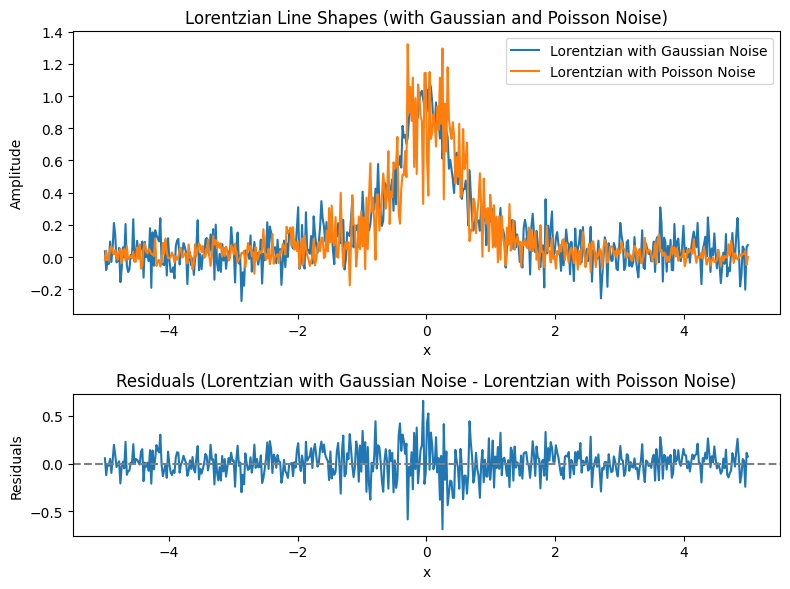

In [32]:
# Create a figure and a set of subplots, adjusting the height ratio
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), gridspec_kw={'height_ratios': [2, 1]})

# Plot Lorentzian line shapes with Gaussian and Poisson noise in the first subplot
axes[0].plot(x, y_lorentzian_noisy, label='Lorentzian with Gaussian Noise')
axes[0].plot(x, y_lorentzian_poisson_noisy, label='Lorentzian with Poisson Noise')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Amplitude')
axes[0].set_title('Lorentzian Line Shapes (with Gaussian and Poisson Noise)')
axes[0].legend()

# Calculate and plot residuals in the second subplot using the noisy data
residuals_lorentzian_noise_comparison = y_lorentzian_noisy - y_lorentzian_poisson_noisy
axes[1].plot(x, residuals_lorentzian_noise_comparison)
axes[1].set_xlabel('x')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals (Lorentzian with Gaussian Noise - Lorentzian with Poisson Noise)')
axes[1].axhline(0, color='gray', linestyle='--') # Add dashed zero line


# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Generate histograms

### Subtask:
Create histograms to compare the distribution of the Gaussian noise and the Poisson noise.


**Reasoning**:
Create histograms for Gaussian and Poisson noise distributions using matplotlib subplots.



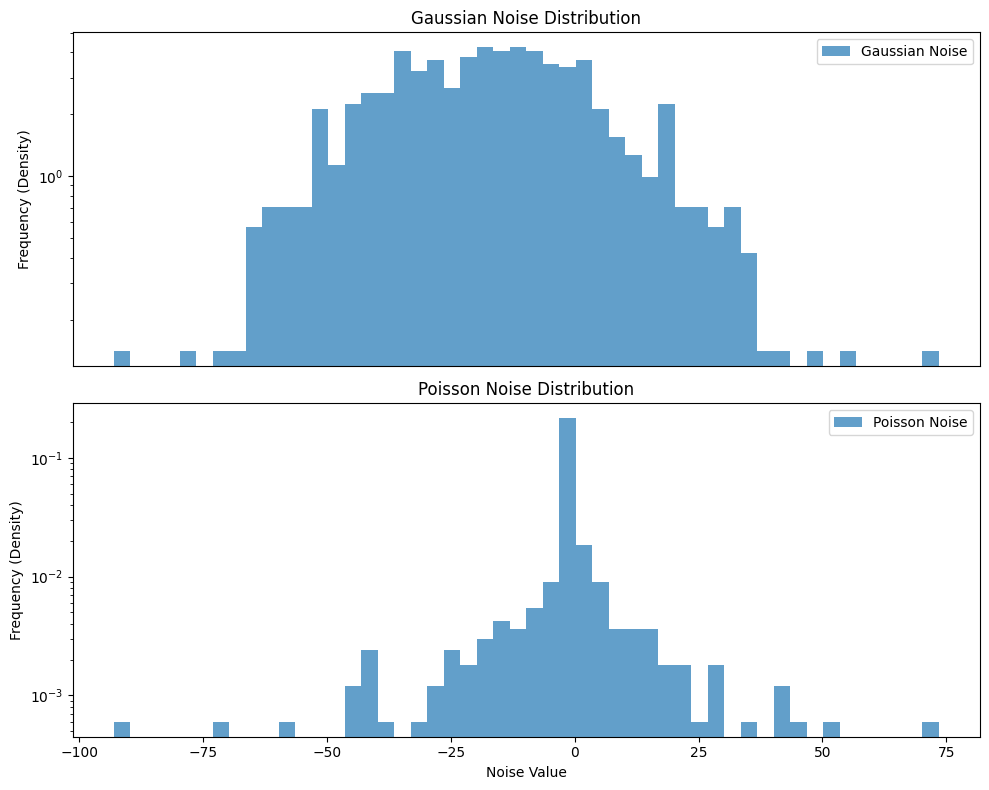

In [34]:
# Create a figure with two subplots, stacked vertically, allowing for shared x-axis initially
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot Gaussian Noise histogram in the first subplot
axes[0].hist(gaussian_noise_gaussian, bins=50, density=True, alpha=0.7, label='Gaussian Noise')
axes[0].set_ylabel('Frequency (Density)')
axes[0].set_title('Gaussian Noise Distribution')
axes[0].legend()
axes[0].set_yscale('log') # Set y-axis to log scale
axes[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Hide x-axis ticks and labels for the top plot

# Plot Poisson Noise histogram in the second subplot
# Normalize by subtracting the mean (expected value) to center the distribution around zero for comparison
poisson_noise_gaussian_centered = poisson_noise_gaussian - y_gaussian_scaled
axes[1].hist(poisson_noise_gaussian_centered, bins=50, density=True, alpha=0.7, label='Poisson Noise', histtype='stepfilled')
axes[1].set_xlabel('Noise Value')
axes[1].set_ylabel('Frequency (Density)')
axes[1].set_title('Poisson Noise Distribution')
axes[1].legend()
axes[1].set_yscale('log') # Set y-axis to log scale


# Adjust layout
plt.tight_layout()
plt.show()